##                                               Heart Disease Classifier

## 1.Problem Definition

`Given clinical records of a patient, can we predict whether he/she has heart disease or not `

## 2. Data



The data is from Cleavland Database from UCI Machine LearningRepo :http://archive.ics.uci.edu/ml/datasets/Heart+Disease

Similar thing available in Kaggle:https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
If the model can predict the result with 95% accuracy, then we'll pursue the project

## 4. Features
The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
             anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
          above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
            0: Nothing to note
            1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
            2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* looks at stress of heart during excercise
* unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
            0: Upsloping: better heart rate with excercise (uncommon)
            1: Flatsloping: minimal change (typical healthy heart)
            2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
        
* thal - thalium stress result
            1,3: normal
            6: fixed defect: used to be defect but ok now
            7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("data/heart-disease.csv")

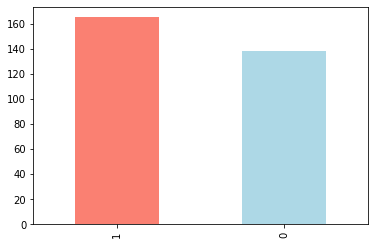

In [3]:
df["target"].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease vs Gender

In [6]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


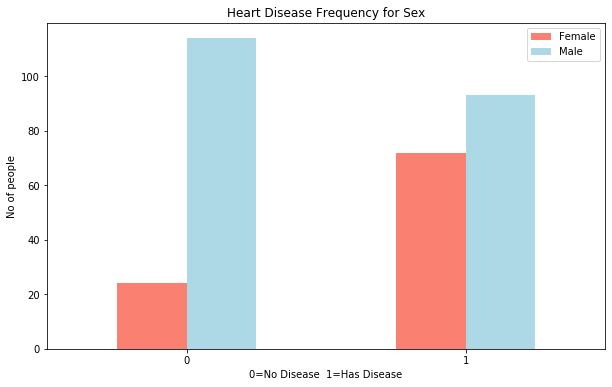

In [8]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue']);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease  1=Has Disease")
plt.ylabel('No of people')
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);


### Age vs Max Heart Rate for Heart Disease

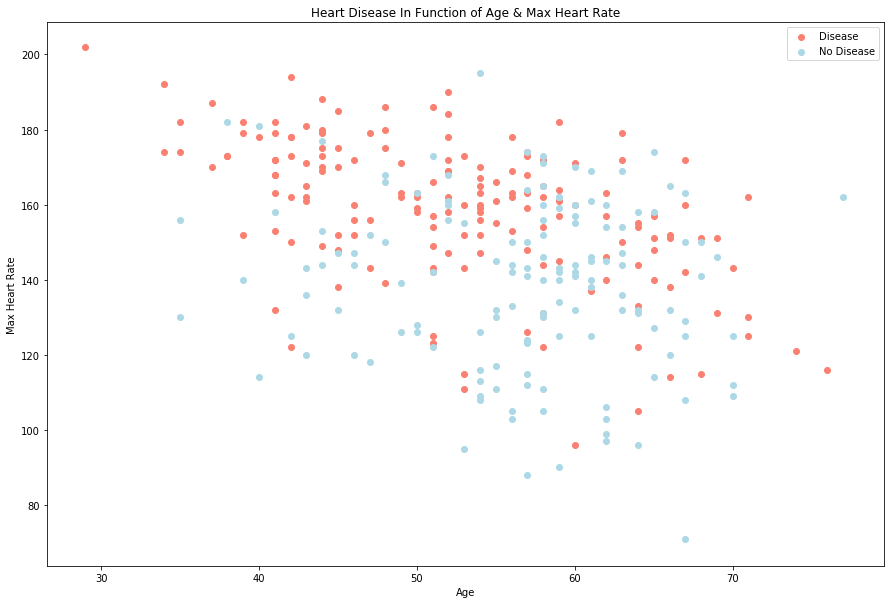

In [9]:
plt.figure(figsize=(15,10))

#Scatter with positive samples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");
#Scatter with negative samples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "lightblue");

plt.title("Heart Disease In Function of Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type

*  0: Typical angina: chest pain related decrease blood supply to the heart
*  1: Atypical angina: chest pain not related to heart
*  2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [10]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


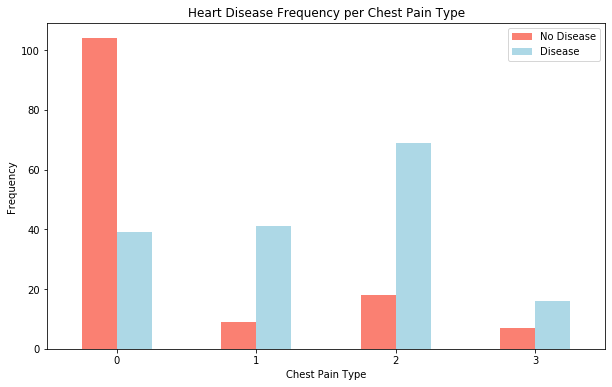

In [11]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                               figsize=(10,6),
                               color =['salmon','lightblue']);
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"]);
plt.xticks(rotation=0);

In [12]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


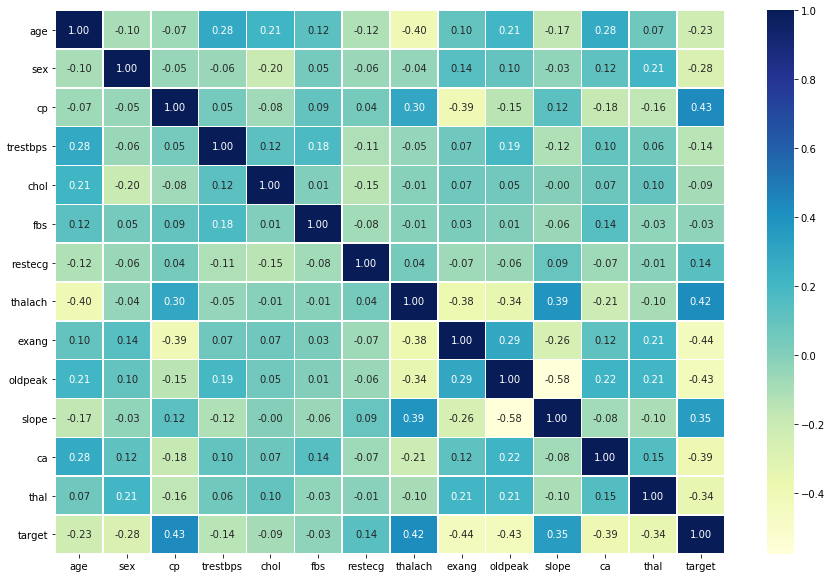

In [13]:
corr_matrx = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrx,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap="YlGnBu");

### Modelling

In [14]:
X = df.drop("target",axis=1)
y = df['target']

In [15]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [16]:
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

#Function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

In [18]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [19]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


In [20]:
model_compare.T

,Accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


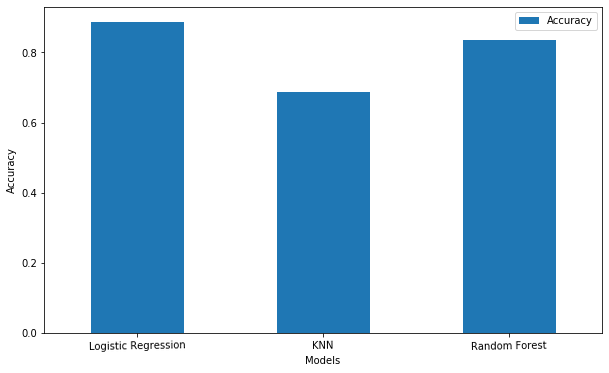

In [21]:
model_compare.T.plot.bar(figsize=(10,6));
plt.xticks(rotation=1);
plt.xlabel("Models");
plt.ylabel("Accuracy");

In [22]:
# Tuning KNN

train_scores = []
test_scores = []

neighbours = range(1,21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [23]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [24]:
test_scores


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data is : 75.41%


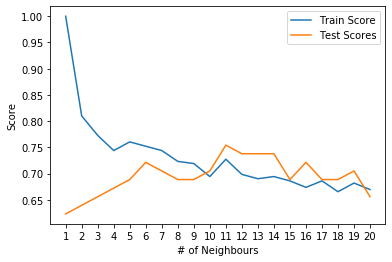

In [25]:

plt.plot(neighbours,train_scores,label="Train Score")
plt.plot(neighbours,test_scores,label="Test Scores");
plt.xticks(np.arange(1,21,1))
plt.xlabel("# of Neighbours")
plt.ylabel("Score")
plt.legend();
print(f"Maximum KNN Score on the test data is : {max(test_scores)*100:.2f}%")

In [26]:
# Discarding KNN

### Hyperparameter tuning with RandomSearchCV

In [27]:
# LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}
#RFClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [28]:
# Using RandomizedCV 
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose=True)

rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(X_test,y_test)*100

88.52459016393442

In [31]:
# RandomForestClassifier

np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose = True)
rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


In [32]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [33]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [34]:
rs_rf.score(X_train,y_train)

0.8553719008264463

## Using GridSearchCV for LogisticsRegression

In [35]:
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose = True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [36]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating Tuned Classifier

In [38]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [39]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

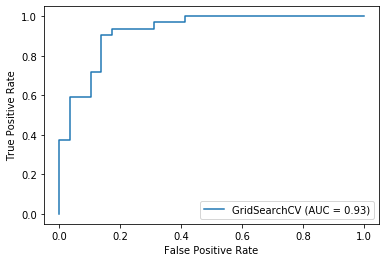

In [40]:
# Plotting the ROC curve

from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg,X_test,y_test);

In [41]:
# Display confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


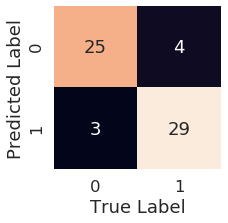

In [42]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test,y_preds)

In [43]:
# Making a Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [44]:
# Creating a new classifier with best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [46]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [47]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [48]:
#Precision
cv_prec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [49]:
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [50]:
#Recall 
cv_rcall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_rcall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [51]:
cv_rcall = np.mean(cv_rcall)
cv_rcall

0.9212121212121213

In [52]:
#F1
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [53]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [54]:
# Visualizing CV Matrix

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_rcall,
                           "F1": cv_f1},
                         index=[0])

In [55]:
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


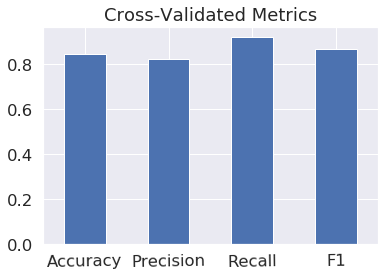

In [56]:
cv_metrics.T.plot.bar(title="Cross-Validated Metrics",legend=False);
plt.xticks(rotation=1);

In [57]:
clf = LogisticRegression(C=0.20433597178569418,solver= 'liblinear')
clf.fit(X_train,y_train);


In [58]:
clf.coef_

array([[ 0.00316728, -0.86044681,  0.66067028, -0.01156993, -0.00166374,
         0.04386098,  0.31275871,  0.02459362, -0.60413098, -0.56862784,
         0.45051633, -0.63609911, -0.67663374]])

In [59]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [60]:
features_dict

{'age': 0.0031672836648050503,
 'sex': -0.8604468104930325,
 'cp': 0.6606702797887507,
 'trestbps': -0.01156993266606034,
 'chol': -0.0016637447948541165,
 'fbs': 0.043860983413115645,
 'restecg': 0.31275871271392713,
 'thalach': 0.024593615341531826,
 'exang': -0.6041309838702352,
 'oldpeak': -0.5686278420079321,
 'slope': 0.45051633355228077,
 'ca': -0.6360991091618156,
 'thal': -0.6766337375624075}

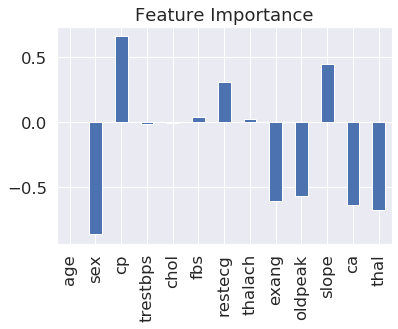

In [61]:
features_df = pd.DataFrame(features_dict,index=[0])
features_df.T.plot.bar(title="Feature Importance",legend=False);

In [62]:
# Saving
import pickle
pickle.dump(clf,open("lg_heart_disease.pkl","wb"))

loaded_pickle_model = pickle.load(open("lg_heart_disease.pkl", "rb"))